
<img src="https://raw.githubusercontent.com/archivesunleashed/archivesunleashed.org/master/themes/hugo-material-docs/static/images/logo-square.png" height="100px" width="100px">


# Welcome to the Domains Analysis Notebook

Welcome to the Archives Unleashed Domains Analysis Jupyter Notebook. This demonstration takes the domain derivatives from the Cloud and uses Python to analyze and produce information about your collection.

Please feel free to create an [issue](https://github.com/archivesunleashed/auk/issues) to let us know about any bugs you encounter or improvements you would like to see.

If you have Python experience, please feel free to change the provided code to suit your own needs.

We recommend that you use `File > Make a Copy` first before changing the code in the repository. That way, you can always return to the basic visualizations we have offered here. Of course, you can also just re-download the Jupyter Notebook file from your Archives Unleashed Cloud account.

### How Jupyter Notebooks Work

If you have no previous experience with Jupyter Notebooks, the most important thing to understand is that that `<Shift> + <Enter/Return>` will run the Python code inside a cell and output it to below the cell.
    
The cells that cover the required inputs, marked "Setup", need to be run before the rest of the notebook will work. These cells will import all the libraries and set basic variables (e.g. where your derivative files are located) for the notebook. After that, everything else should be able to run on its own.

If you just want to see all results for your collection, use `Cell > Run All`.


# Setup

## The Collection ID

This variable is the most important, and the only variable you need to change to see a complete set of visualizations for your [Archives Unleashed Cloud derivatives](https://cloud.archivesunleashed.org/derivatives).

In [1]:
COLLECTION_ID = '4867'  # Change to switch collections.
AUK_PATH = 'data/'  # Change value to full path to your data, including trailing slash.

This section imports the AuNotebook custom class that includes some methods for accessing derivatives and producing visualizations. Also, some libraries like [pandas](https://pandas.pydata.org/), [numpy](http://www.numpy.org/), [networkx](https://networkx.github.io/), and [nltk](https://www.nltk.org/) will be imported so you can do additional analysis.

In [2]:
# Required packages.

from au_notebook import au_notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## User Configuration

The following cell sets up the notebook functions under the name `nb`. If you want to use one of the functions in the class, you can use `nb.function_name()`. For example, `nb.get_text()` returns the data from the text derivative as a single text string. Use `nb.__dict__` to see the available settings and functions and `help(nb.function_name)` to see the documentation for a particular function. 

While setting up the functions, you may also want to change some of the default settings.

Take a look here: are there any domains you are not interested in? How many words would you like to be shown? Do you want to filter out 404 results? Do you want to sample the data? Read the choices below carefully.

In [3]:
nb = au_notebook(COLLECTION_ID, AUK_PATH,

# Maximum number of words to show in output.
# Jupyter will create an output error if the number is too high.

TOP_COUNT = 30,

# Domain suffixes to check non-U.S. domains so that (e.g.) www.google.co.uk will become "google".

STOP_DOMAINS = ["co", "org", "net", "edu"], # Domain suffixes to remove.

FILTERED_DOMAINS = [], # E.g ["google", "apple", "facebook"].

)

# Basic Analysis of Domains

Domains data provides basic information about what is crawled and how often. Change the variables in the following cell to manipulate the domain analysis. For example, you may want to exclude common domains (i.e. "google") or you may be interested in sub-domains such as ca.geocities.com.

In [4]:
DOMAIN_BY = 'full' # Change to 'sub' if you want to include subdomains.
DOMAIN_EXCLUDE = ['google', 'facebook', 'youtube', 'apple'] # Add items to this list to exclude from the collection.
DOMAIN_FIGURE_SIZE = [10, 4] # Change the width and height of your graph plot ([wdth, hgt]).
DOMAIN_RESULTS = 30 # The number of results to plot.
DOMAIN_BAR_WIDTH = 0.35 # The width of the bars in the histogram.
DOMAIN_Y_LABEL = "Number of occurences." # The label for the y axis.
DOMAIN_TITLE = "Top domains by count." # The title of the graph.
DOMAIN_CSV_OUTPUT = 'domains.csv' # Name of .csv file for output.

In [5]:
domains = nb.get_domains(DOMAIN_BY) # Gets the data from the domains derivative.

## Add Domain Data to Pandas Dataframe and Output to CSV

Domain data is usually straight forward, but you may want to add additional modifiers. Pandas dataframes are a good way of doing this.

In [6]:
domain_array = [(key, key.split('.')[-1], val) for key, val in domains.items()]
dataframe = pd.DataFrame(domain_array, columns=['DOMAIN', 'SUFFIX', 'COUNT'])

print(dataframe.iloc[0:4])

## Removing the # on the following line will write the results 
## as a csv file to DOMAIN_CSV_OUTPUT ('domains.csv' by default).

# dataframe.to_csv(DOMAIN_CSV_OUTPUT)

               DOMAIN SUFFIX  COUNT
0  support.google.com    com     18
1         storify.com    com     18
2   www.globalnews.ca     ca     15
3        www.scmp.com    com     15


In [7]:
print(
    dataframe.loc[dataframe['SUFFIX'] == 'com'] # Get just the .com domains.
        .sort_values(by='COUNT', axis=0, ascending=False) # Sort by count.
        .iloc[0:4] # Get first 4 items.
     )

                           DOMAIN SUFFIX  COUNT
8              www.bcliberals.com    com  91615
10                    twitter.com    com   8474
11  www.staffroomconfidential.com    com   2776
12               www.facebook.com    com   2552


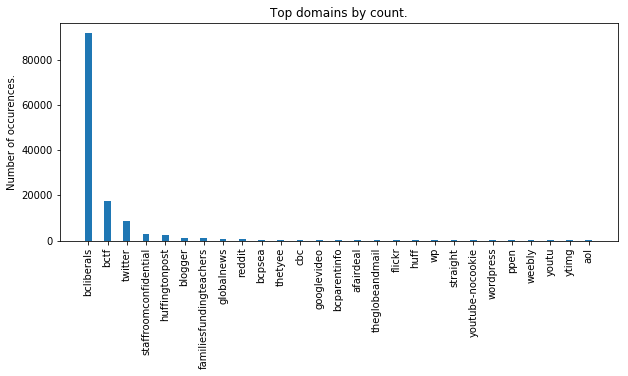

In [8]:
# Count the times a domain appears and count it.

name_domains = nb.get_domains('name') # Remove prefix and suffix (ie. 'www.google.com' becomes 'google').
plt.rcParams['figure.figsize'] = DOMAIN_FIGURE_SIZE # Set the figure size for the graph.
most_common = name_domains.most_common(DOMAIN_RESULTS) 
vals = [x[1] for x in most_common if x[0] not in DOMAIN_EXCLUDE]
labs = [x[0] for x in most_common if x[0] not in DOMAIN_EXCLUDE]
ind = np.arange(len(vals))
width = DOMAIN_BAR_WIDTH
p1 = plt.bar(ind, vals, width)
plt.ylabel(DOMAIN_Y_LABEL)
plt.title(DOMAIN_TITLE)
plt.xticks(ind, labs, rotation='vertical')
plt.show()

# Bibliography
- Archives Unleashed Project. (2018). Archives Unleashed Toolkit (Version 0.17.0). Apache License, Version 2.0.
- Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008.
- Bird, Steven, Edward Loper and Ewan Klein (2009), *Natural Language Processing with Python*. O’Reilly Media Inc.
- University of Victoria Libraries, B.C. Teachers' Labour Dispute (2014), Archive-It Collection 4867, https://archive-it.org/collections/4867.